problem statement : Boston data related to house is given to us. We need to predict the price of the particular house with respect to the features given to us . 

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression , RidgeCV , LassoCV , ElasticNetCV
from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle 

## EDA and Data Derivations

In [24]:
X = pd.DataFrame(load_boston()["data"] , columns=load_boston()["feature_names"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
y = pd.DataFrame(load_boston()["target"] , columns=["Price"])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [30]:
df = X
df["Price"] = y["Price"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


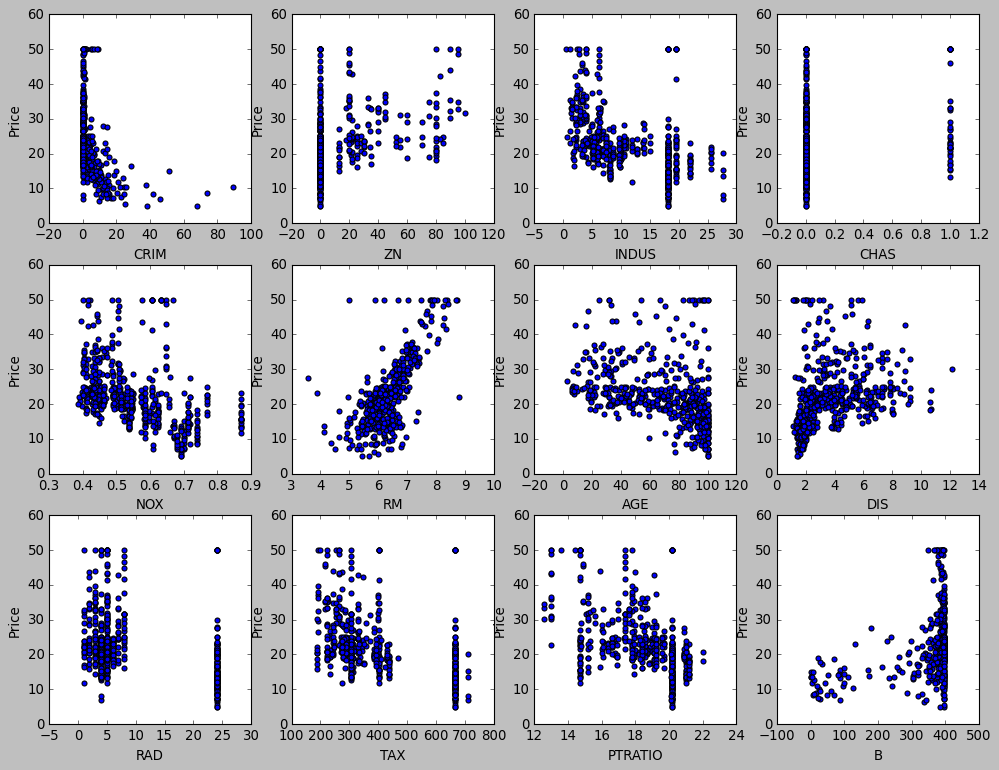

In [35]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,15))
for i in range(12):
    ax = plt.subplot(4,4, i+1)
    ax.scatter(X.iloc[:,i] , y)
    ax.set_xlabel(X.columns[i])
    ax.set_ylabel("Price")

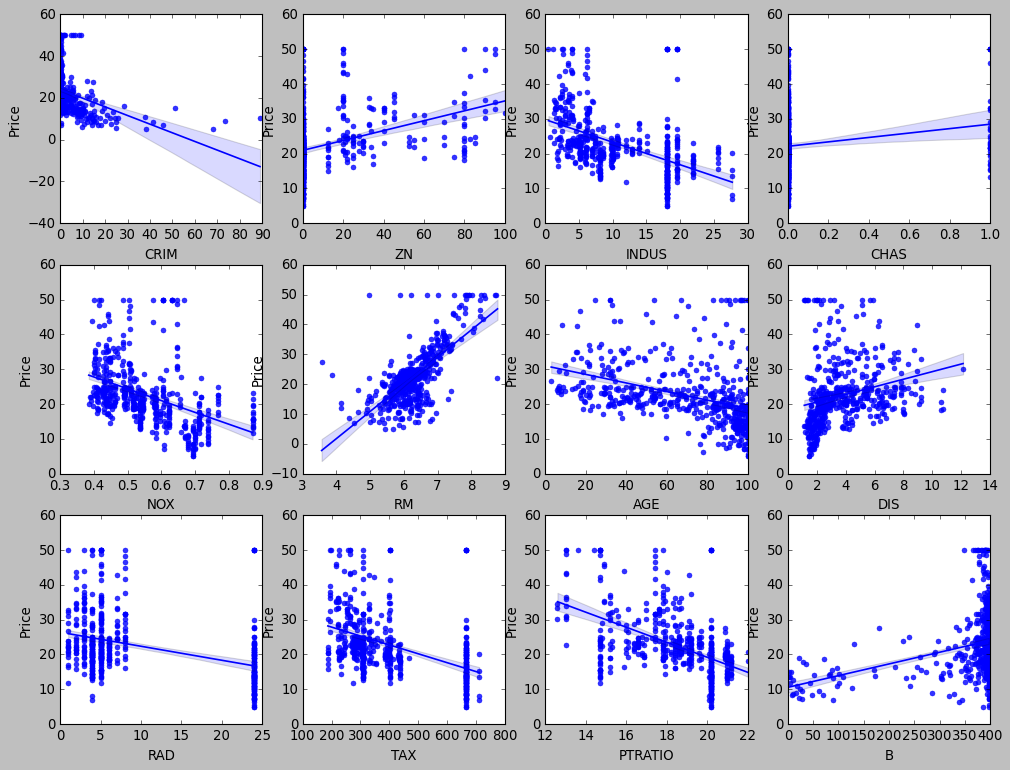

In [99]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(4,4, i+1)
    sns.regplot(data= df, x = df.columns[i] , y = "Price")

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


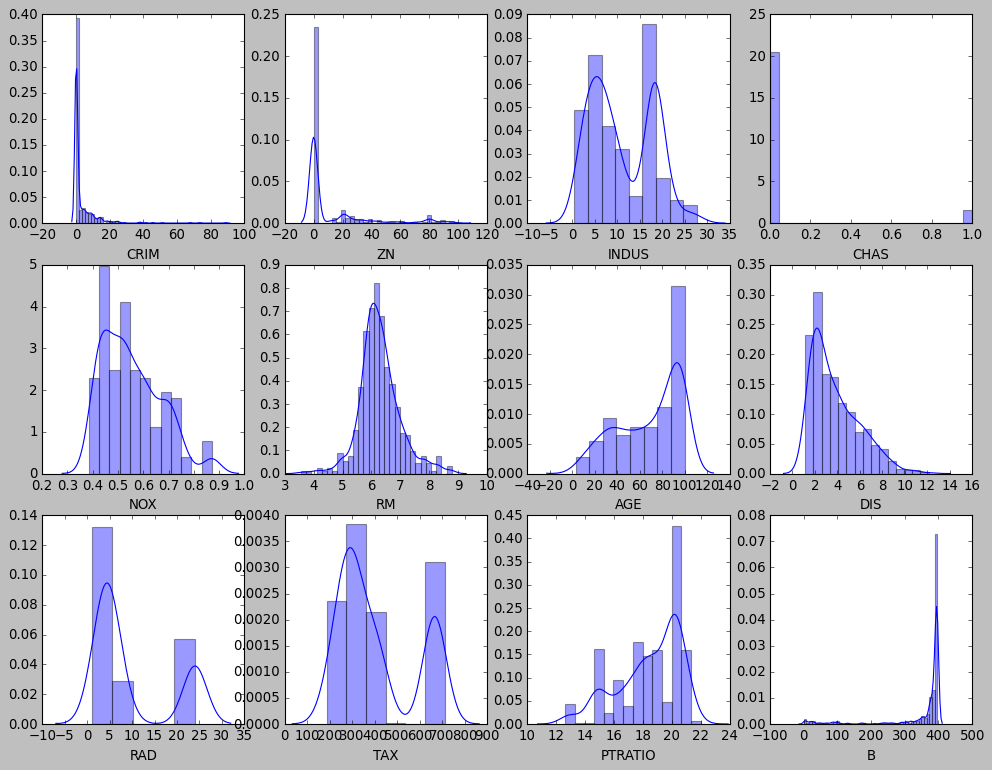

In [48]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(4,4, i+1)
    ax = sns.distplot(X.iloc[:,i])
    ax.set_xlabel(X.columns[i])

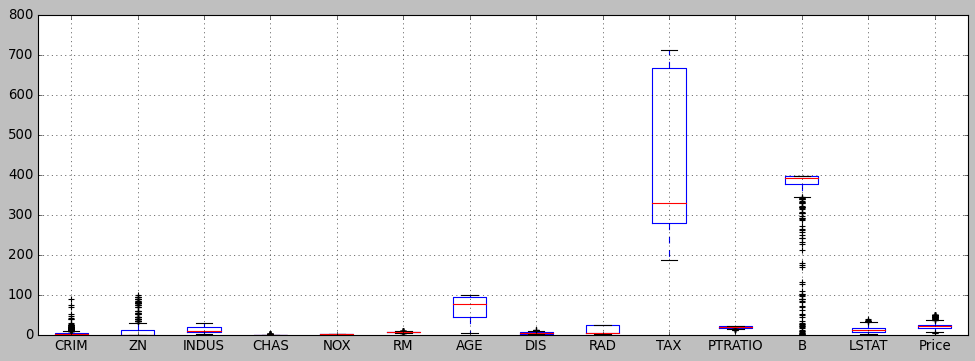

In [102]:
df.boxplot(figsize=(15,5))

In [50]:
sc = StandardScaler()
scaled = sc.fit_transform(X)

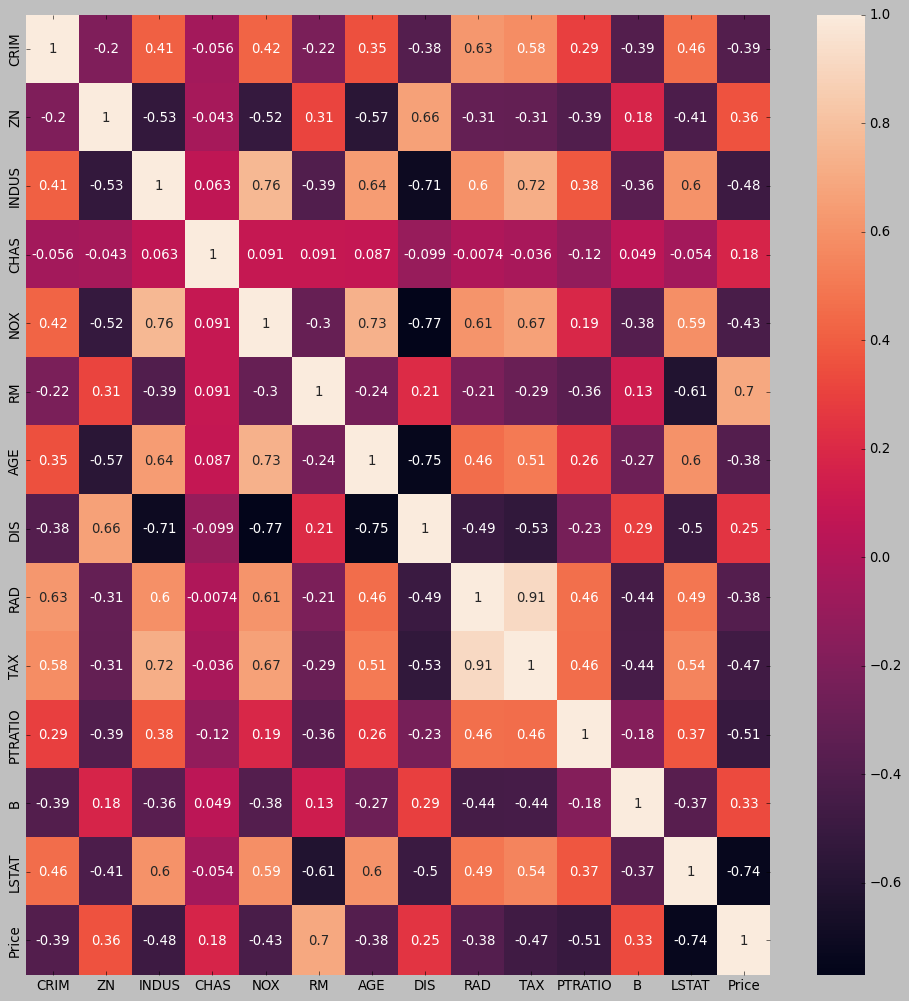

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [60]:
vif = []
for i in range(len(X.columns)):
    vif.append(variance_inflation_factor(scaled , i))

In [64]:
VIF = pd.DataFrame({"Features":X.columns , "VIF":vif})
VIF

,Features,VIF
0,CRIM,1.831537
1,ZN,2.352186
2,INDUS,3.992503
3,CHAS,1.095223
4,NOX,4.586920
5,RM,2.260374
6,AGE,3.100843
7,DIS,4.396007
8,RAD,7.808198
9,TAX,9.205542


In [70]:
X = pd.DataFrame(scaled, columns=X.columns)

In [71]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [74]:
derived_feature = []
for i,j in X[["RAD", "TAX"]].values:
    derived_feature.append(round((i+j)/2 , 2))

In [76]:
X['Derived_feature'] = derived_feature
X.drop(["RAD", "TAX"], axis = 1 , inplace = True)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 101 , test_size = 0.25)

In [79]:
print("Independent feature training shape = ", np.shape(x_train))
print("Independent feature target shape = ", np.shape(y_train))
print("Dependent feature training shape = ", np.shape(x_test))
print("Dependent feature target shape = ", np.shape(y_test))

Independent feature training shape =  (379, 13)
Independent feature target shape =  (379, 1)
Dependent feature training shape =  (127, 13)
Dependent feature target shape =  (127, 1)


## Model Selection

In [80]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test , y_test)

1.0

In [81]:
lr = LassoCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9999989770404447

In [82]:
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.999999627891788

In [84]:
lr = ElasticNetCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9996982959051736

## Selected Model

In [85]:
## Final model : No need of Hyperparameter tuning it will overfit like Linear regression
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.999999627891788

## Saving model for deployment

In [86]:
pickle.dump(lr, open("Desktop/Boston/model.pickle", "wb"))
pickle.dump(sc, open("Desktop/Boston/scaler.pickle", "wb"))